In [7]:
# Import the random module.
import random

In [8]:
random.random()

0.12911470989228369

In [9]:
random.randint (-90, 90)

64

In [10]:
random.random() 

0.03735674794644739

In [11]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 90) + random.random()
    latitudes.append(random_lat)
    x += 1

In [12]:
latitudes

[-66.2563928087357,
 18.76863106841911,
 -24.61233296882979,
 90.45452690779246,
 58.034465581343774,
 16.243156339772323,
 89.40311212406102,
 -88.55425646137395,
 -53.36584006633028,
 -50.90996170317526]

In [13]:
random.randrange(-90, 90, step=1)

34

In [14]:
random.randrange(-90, 90, step=3)

-81

In [15]:
random.uniform(-90, 90)

-88.12271177391418

In [16]:
random.uniform(-9, 9)

8.06685589010026

In [17]:
# Import the NumPy module.
import numpy as np

In [18]:
np.random.uniform(-90.000, 90.000)

23.359079609356172

In [19]:
np.random.uniform(-90.000, 90.000, size=1500)

array([-24.34939688, -20.53445517,  81.76703504, ..., -36.92696444,
        -5.81864171,  36.13412517])

In [20]:
# Import timeit.
import timeit

In [21]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

20.3 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500. 
%timeit latitudes(1500)

2.32 ms ± 69.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
def latitudes(size):
    latitudes = []
    for x in range(size) :
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
    return latitudes
# Call the function with 1500. 
%timeit latitudes(1500)

2.46 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [29]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a64c796d97ed68b62f3c37ff8fa4295d


In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------


In [33]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | arlit
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | carnarvon
Processing Record 4 of Set 13 | cabo san lucas
Processing Record 5 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 13 | broome
Processing Record 7 of Set 13 | ponta do sol
Processing Record 8 of Set 13 | palauig
Processing Record 9 of Set 13 | rikitea
Processing Record 10 of Set 13 | albany
Processing Record 11 of Set 13 | bandarbeyla
Processing Record 12 of Set 13 | kodiak
Processing Record 13 of Set 13 | bur gabo
City not found. Skipping...
Processing Record 14 of Set 13 | buala
Processing Record 15 of Set 13 | chokurdakh
Processing Record 16 of Set 13 | zapolyarnyy
Processing Record 17 of Set 13 | kimbe
Processing Record 18 of Set 13 | longyearbyen
Processing Record 19 of Set 13 | hilo
Processing Record 20 of Set 13 | saskylakh
Processing Record 21 of Set 13 | mehamn
Processing Record 22 of Set 13 | barrow
Processing Record 23 of Se

Processing Record 33 of Set 16 | pitimbu
Processing Record 34 of Set 16 | savino
Processing Record 35 of Set 16 | souillac
Processing Record 36 of Set 16 | grindavik
Processing Record 37 of Set 16 | san jose
Processing Record 38 of Set 16 | mendoza
Processing Record 39 of Set 16 | robertsport
Processing Record 40 of Set 16 | grajau
Processing Record 41 of Set 16 | victoria
Processing Record 42 of Set 16 | saint george
Processing Record 43 of Set 16 | bonavista
Processing Record 44 of Set 16 | belaya rechka
Processing Record 45 of Set 16 | baykit
Processing Record 46 of Set 16 | sungaipenuh
Processing Record 47 of Set 16 | tunxi
City not found. Skipping...
Processing Record 48 of Set 16 | faya
Processing Record 49 of Set 16 | constitucion
Processing Record 50 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 17 | preobrazheniye
Processing Record 2 of Set 17 | maldonado
Processing Record 3 of Set 17 | beloha
Processing Record 4 of Set 17 | kieta
Processing Record 5 of Set 

Processing Record 20 of Set 20 | eureka
Processing Record 21 of Set 20 | charters towers
Processing Record 22 of Set 20 | vieux fort
Processing Record 23 of Set 20 | inderborskiy
City not found. Skipping...
Processing Record 24 of Set 20 | rio grande
Processing Record 25 of Set 20 | komsomolskiy
Processing Record 26 of Set 20 | rocha
Processing Record 27 of Set 20 | talcahuano
Processing Record 28 of Set 20 | zinder
Processing Record 29 of Set 20 | okhotsk
Processing Record 30 of Set 20 | rorvik
Processing Record 31 of Set 20 | broken hill
Processing Record 32 of Set 20 | neuquen
Processing Record 33 of Set 20 | royan
Processing Record 34 of Set 20 | daitari
Processing Record 35 of Set 20 | beyneu
Processing Record 36 of Set 20 | omboue
Processing Record 37 of Set 20 | fortuna
Processing Record 38 of Set 20 | ust-bolsheretsk
City not found. Skipping...
Processing Record 39 of Set 20 | almeirim
Processing Record 40 of Set 20 | parati
Processing Record 41 of Set 20 | puqi
Processing Reco

Processing Record 7 of Set 24 | paoua
Processing Record 8 of Set 24 | chagda
City not found. Skipping...
Processing Record 9 of Set 24 | coihaique
Processing Record 10 of Set 24 | barraute
Processing Record 11 of Set 24 | idrinskoye
Processing Record 12 of Set 24 | pangai
Processing Record 13 of Set 24 | vavuniya
Processing Record 14 of Set 24 | tokur
Processing Record 15 of Set 24 | bara
Processing Record 16 of Set 24 | vestmannaeyjar
Processing Record 17 of Set 24 | durusu
Processing Record 18 of Set 24 | milazzo
Processing Record 19 of Set 24 | churapcha
Processing Record 20 of Set 24 | sola
Processing Record 21 of Set 24 | boca do acre
Processing Record 22 of Set 24 | mao
Processing Record 23 of Set 24 | talaya
Processing Record 24 of Set 24 | faanui
Processing Record 25 of Set 24 | kaeo
Processing Record 26 of Set 24 | diamantino
Processing Record 27 of Set 24 | kenai
Processing Record 28 of Set 24 | bolshaya sosnova
Processing Record 29 of Set 24 | tommot
Processing Record 30 of 

In [34]:
len(city_data)

557

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arlit,18.74,7.39,62.55,22,34,9.19,NE,2020-02-21 06:50:16
1,Ushuaia,-54.80,-68.30,57.20,62,75,17.22,AR,2020-02-21 06:50:17
2,Carnarvon,-24.87,113.63,87.80,62,100,20.80,AU,2020-02-21 06:50:17
3,Cabo San Lucas,22.89,-109.91,70.00,56,0,6.82,MX,2020-02-21 06:50:17
4,Broome,42.25,-75.83,15.80,92,90,2.86,US,2020-02-21 06:50:18
5,Ponta Do Sol,32.67,-17.10,57.20,71,40,11.41,PT,2020-02-21 06:50:18
6,Palauig,15.44,119.90,85.86,41,4,3.91,PH,2020-02-21 06:50:18
7,Rikitea,-23.12,-134.97,78.49,75,42,13.85,PF,2020-02-21 06:50:18
8,Albany,42.60,-73.97,18.00,85,1,3.36,US,2020-02-21 06:50:19
9,Bandarbeyla,9.49,50.81,77.83,72,52,9.62,SO,2020-02-21 06:50:19


In [36]:
new_col_ord = ["City", "Country","Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_ord]

In [37]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlit,NE,2020-02-21 06:50:16,18.74,7.39,62.55,22,34,9.19
1,Ushuaia,AR,2020-02-21 06:50:17,-54.80,-68.30,57.20,62,75,17.22
2,Carnarvon,AU,2020-02-21 06:50:17,-24.87,113.63,87.80,62,100,20.80
3,Cabo San Lucas,MX,2020-02-21 06:50:17,22.89,-109.91,70.00,56,0,6.82
4,Broome,US,2020-02-21 06:50:18,42.25,-75.83,15.80,92,90,2.86
5,Ponta Do Sol,PT,2020-02-21 06:50:18,32.67,-17.10,57.20,71,40,11.41
6,Palauig,PH,2020-02-21 06:50:18,15.44,119.90,85.86,41,4,3.91
7,Rikitea,PF,2020-02-21 06:50:18,-23.12,-134.97,78.49,75,42,13.85
8,Albany,US,2020-02-21 06:50:19,42.60,-73.97,18.00,85,1,3.36
9,Bandarbeyla,SO,2020-02-21 06:50:19,9.49,50.81,77.83,72,52,9.62


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

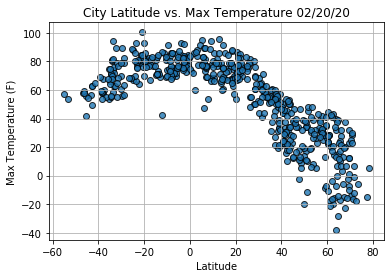

In [40]:
# Import the time module.
import time
# IMporting Matplotlib
import matplotlib.pyplot as plt
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

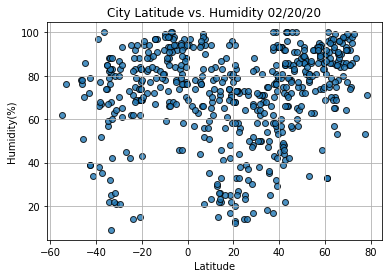

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

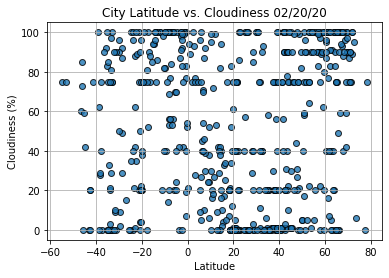

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

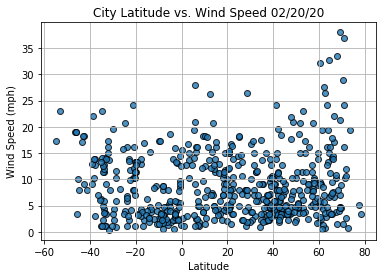

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [65]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [49]:
index13 = city_data_df.loc[13]
index13

City                  Zapolyarnyy
Country                        RU
Date          2020-02-21 06:50:20
Lat                         69.42
Lng                         30.81
Max Temp                       23
Humidity                       92
Cloudiness                     90
Wind Speed                  38.03
Name: 13, dtype: object

In [50]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlit,NE,2020-02-21 06:50:16,18.74,7.39,62.55,22,34,9.19
1,Ushuaia,AR,2020-02-21 06:50:17,-54.80,-68.30,57.20,62,75,17.22
2,Carnarvon,AU,2020-02-21 06:50:17,-24.87,113.63,87.80,62,100,20.80
3,Cabo San Lucas,MX,2020-02-21 06:50:17,22.89,-109.91,70.00,56,0,6.82
4,Broome,US,2020-02-21 06:50:18,42.25,-75.83,15.80,92,90,2.86


In [51]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
552     True
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

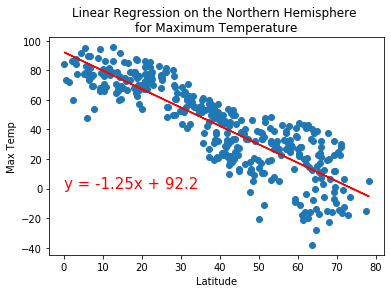

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,0))

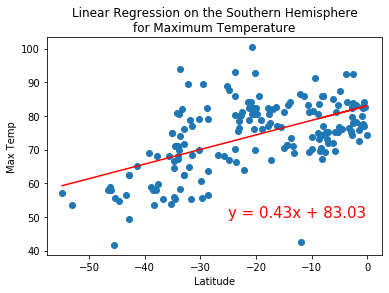

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-25,50))

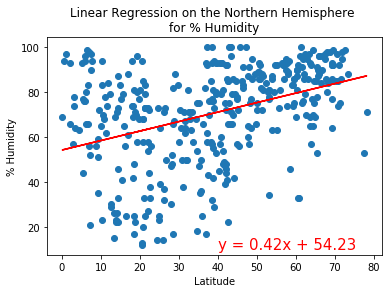

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

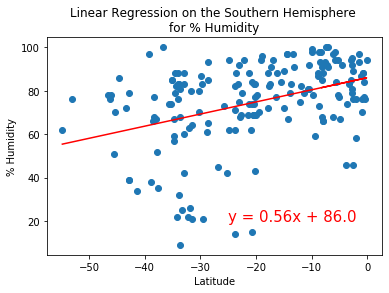

In [72]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-25,20))

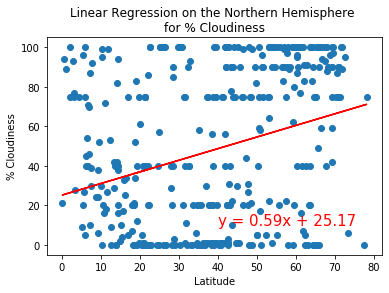

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

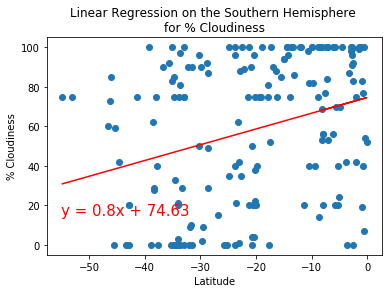

In [76]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,15))

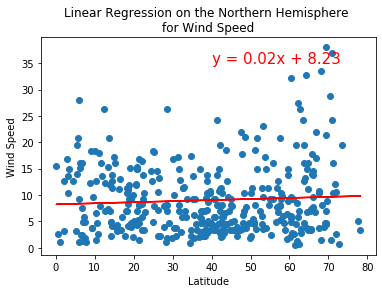

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

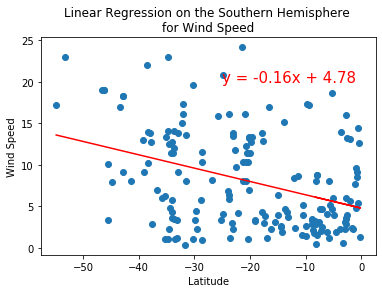

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-25,20))